In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.ticker as ticker
import seaborn as sns
import re






,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
0,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[107 / 0x006b] Strings: ['\Microsoft\Windows\W...,[107 / 0x006b] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
1,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[129 / 0x0081] Strings: ['\Microsoft\Windows\W...,[129 / 0x0081] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
2,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[100 / 0x0064] Strings: ['\Microsoft\Windows\W...,[100 / 0x0064] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
3,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[200 / 0x00c8] Strings: ['\Microsoft\Windows\W...,[200 / 0x00c8] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
4,08/23/2018,00:01:13,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[140 / 0x008c] Strings: ['\Microsoft\Windows\W...,[140 / 0x008c] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...


In [149]:
# useful links https://github.com/jleaniz/misc/blob/master/timeilne_analysis.ipynb

#filename = 'baserd01-filesystem-timeline.csv'
filename = 'base-rd-01-supertimeline.csv'
df = pd.read_csv(filename)

In [148]:
df.head()

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra,year,month,day
0,2018-08-23,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[107 / 0x006b] Strings: ['\Microsoft\Windows\W...,[107 / 0x006b] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...,2018,8,23
1,2018-08-23,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[129 / 0x0081] Strings: ['\Microsoft\Windows\W...,[129 / 0x0081] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...,2018,8,23
2,2018-08-23,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[100 / 0x0064] Strings: ['\Microsoft\Windows\W...,[100 / 0x0064] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...,2018,8,23
3,2018-08-23,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[200 / 0x00c8] Strings: ['\Microsoft\Windows\W...,[200 / 0x00c8] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...,2018,8,23
4,2018-08-23,00:01:13,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[140 / 0x008c] Strings: ['\Microsoft\Windows\W...,[140 / 0x008c] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...,2018,8,23


In [88]:
print(df.columns)




Index(['date', 'time', 'timezone', 'MACB', 'source', 'sourcetype', 'type',
       'user', 'host', 'short', 'desc', 'version', 'filename', 'inode',
       'notes', 'format', 'extra'],
      dtype='object')


In [71]:
df.head()

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
0,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[107 / 0x006b] Strings: ['\Microsoft\Windows\W...,[107 / 0x006b] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
1,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[129 / 0x0081] Strings: ['\Microsoft\Windows\W...,[129 / 0x0081] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
2,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[100 / 0x0064] Strings: ['\Microsoft\Windows\W...,[100 / 0x0064] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
3,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[200 / 0x00c8] Strings: ['\Microsoft\Windows\W...,[200 / 0x00c8] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
4,08/23/2018,00:01:13,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[140 / 0x008c] Strings: ['\Microsoft\Windows\W...,[140 / 0x008c] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...


In [72]:
df.tail()

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
185161,09/06/2018,23:58:34,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[1223 / 0x04c7] Strings: ['BND' '3' 'CON\QOS...,[1223 / 0x04c7] Source Name: Microsoft-Windows...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: a677ac5be58f722...
185162,09/06/2018,23:58:34,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[1267 / 0x04f3] Strings: ['BND' '3' 'CON\QOS...,[1267 / 0x04f3] Source Name: Microsoft-Windows...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: a677ac5be58f722...
185163,09/06/2018,23:59:03,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[145 / 0x0091] Strings: ['Enumeration' 'http:...,[145 / 0x0091] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: 6807dc60332085a...
185164,09/06/2018,23:59:03,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[132 / 0x0084] Strings: ['Enumeration'],[132 / 0x0084] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: 6807dc60332085a...
185165,09/06/2018,23:59:15,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[5857 / 0x16e1] Strings: ['WmiPerfInst' '0x00...,[5857 / 0x16e1] Source Name: Microsoft-Windows...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: 14f3fb53ec0b7de...


In [86]:
df.columns

Index(['date', 'time', 'timezone', 'MACB', 'source', 'sourcetype', 'type',
       'user', 'host', 'short', 'desc', 'version', 'filename', 'inode',
       'notes', 'format', 'extra', 'year', 'month', 'day'],
      dtype='object')

In [89]:
df['date'].unique()

array(['08/23/2018', '08/24/2018', '08/25/2018', '08/26/2018',
       '08/27/2018', '08/28/2018', '08/29/2018', '08/30/2018',
       '08/31/2018', '09/01/2018', '09/02/2018', '09/03/2018',
       '09/04/2018', '09/05/2018', '09/06/2018'], dtype=object)

In [90]:
df.time.unique()

array(['00:01:01', '00:01:13', '00:03:22', ..., '23:58:32', '23:59:03',
       '23:59:15'], dtype=object)

In [91]:
df.timezone.unique()

array(['UTC'], dtype=object)

In [92]:
df.MACB.unique()

array(['M...', '....', 'MACB', '.A..', '...B', 'MA.B', 'MAC.', '..CB',
       '.A.B', '.ACB', '..C.', '.AC.', 'MA..', 'M.C.', 'M..B'],
      dtype=object)

In [93]:
df.source.unique()

array(['EVT', 'WEBHIST', 'LOG', 'FILE', 'REG', 'PE', 'LNK', 'OLECF',
       'META', 'RECBIN'], dtype=object)

In [94]:
df.sourcetype.unique()

array(['WinEVTX', 'Chrome Cookies', 'WinPrefetch', 'Mactime Bodyfile',
       'UNKNOWN', 'AppCompatCache Registry Entry', 'Chrome Cache',
       'PE Compilation time', 'Windows Shortcut', 'File entry shell item',
       'Task Cache', 'System', 'Chrome History', 'UNKNOWN : BagMRU', nan,
       'Chrome Extensions Autoupdater', 'UNKNOWN : MRUListEx',
       'OLECF Item', 'Chrome Extension Installation',
       'Registry Key: UserAssist', 'Open XML Metadata',
       'UNKNOWN : Network Drive', 'UNKNOWN : Typed URLs',
       'UNKNOWN : Run Key', 'UNKNOWN : MRU List',
       'UNKNOWN : RDP Connection', 'Recycle Bin',
       'System: Network Connection', 'Registry Key Shutdown Entry',
       'UNKNOWN : Winlogon'], dtype=object)

In [95]:
df.type.unique()

array(['Content Modification Time', 'Expiration Time',
       'Previous Last Time Executed',
       'Content Modification Time; Creation Time; Last Access Time; Metadata Modification Time',
       'File Last Modification Time', 'Last Visited Time',
       'Creation Time',
       'Content Modification Time; Creation Time; Last Access Time',
       'Content Modification Time; Last Access Time; Metadata Modification Time',
       'Creation Time; Metadata Modification Time',
       'Creation Time; Last Access Time',
       'Creation Time; Last Access Time; Metadata Modification Time',
       'Metadata Modification Time',
       'Last Access Time; Metadata Modification Time',
       'Content Modification Time; Last Access Time',
       'Content Modification Time; Metadata Modification Time',
       'Last registered time', 'Last Access Time',
       'Content Modification Time; Creation Time', 'Last Time Executed',
       'File Downloaded', 'Unknown Time', 'Launch time',
       'Content Delet

In [96]:
df.columns

Index(['date', 'time', 'timezone', 'MACB', 'source', 'sourcetype', 'type',
       'user', 'host', 'short', 'desc', 'version', 'filename', 'inode',
       'notes', 'format', 'extra'],
      dtype='object')

In [97]:
df.user.unique()

array(['-'], dtype=object)

In [98]:
df.host.unique()

array(['-', 'base-rd-01'], dtype=object)

In [99]:
df.short.unique()

array(["[107 / 0x006b] Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueRep...",
       "[129 / 0x0081] Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueRep...",
       "[100 / 0x0064] Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueRep...",
       ...,
       "[8012 / 0x1f4c] Strings: ['0x00000240800fe190'  '7632'  'Key:NegotiatingUnlea...",
       "[8012 / 0x1f4c] Strings: ['0x00000240800fe190'  '7632'  'Key:Valid'  'Key:Inv...",
       "[1223 / 0x04c7] Strings: ['CNT'  '1'  'CON'  '260'  '436F6E746578743A20656139..."],
      dtype=object)

In [100]:
df.desc.unique()

array(["[107 / 0x006b] Source Name: Microsoft-Windows-TaskScheduler Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueReporting'  '{6C43A72F-4B21-4071-B619-CE26EF192DC1}'] Computer Name: base-rd-01.shieldbase.lan Record Number: 187435 Event Level: 4",
       "[129 / 0x0081] Source Name: Microsoft-Windows-TaskScheduler Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueReporting'  '%windir%\\system32\\wermgr.exe'  '6788'  '16384'] Computer Name: base-rd-01.shieldbase.lan Record Number: 187436 Event Level: 4",
       "[100 / 0x0064] Source Name: Microsoft-Windows-TaskScheduler Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueReporting'  'NT AUTHORITY\\SYSTEM'  '{6C43A72F-4B21-4071-B619-CE26EF192DC1}'] Computer Name: base-rd-01.shieldbase.lan Record Number: 187437 Event Level: 4",
       ...,
       "[145 / 0x0091] Source Name: Microsoft-Windows-WinRM Strings: ['Enumeration'  'http://schemas.microsoft.com/wbem/wsman/1/SubscriptionManager/Subscription

In [101]:
df.columns

Index(['date', 'time', 'timezone', 'MACB', 'source', 'sourcetype', 'type',
       'user', 'host', 'short', 'desc', 'version', 'filename', 'inode',
       'notes', 'format', 'extra'],
      dtype='object')

In [102]:
df.version.unique()

array([2], dtype=int64)

In [103]:
df.filename.unique()

array(['OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-TaskScheduler%4Operational.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-SMBServer%4Audit.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Security.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-Known Folders API Service.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-Security-Audit-Configuration-Client%4Operational.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\System.evtx',
       'OS:E:\\C\\Users\\tdungan\\AppData\\Local\\Google\\Chrome\\User Data\\Default\\Cookies',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-Storage-Storport%4Operational.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-Ntfs%4Operational.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-StateRepository%4Operational.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\

In [104]:
df.inode.unique()

array([     0,  59617,  13553, ..., 199470,  39302,  21832], dtype=int64)

In [105]:
df.notes.unique()

array(['-'], dtype=object)

In [107]:
df.columns

Index(['date', 'time', 'timezone', 'MACB', 'source', 'sourcetype', 'type',
       'user', 'host', 'short', 'desc', 'version', 'filename', 'inode',
       'notes', 'format', 'extra'],
      dtype='object')

In [108]:
df.format.unique()

array(['winevtx', 'sqlite/chrome_cookies', 'prefetch', 'mactime',
       'winreg/winreg_default', 'winreg/appcompatcache', 'chrome_cache',
       'pe', 'olecf/olecf_automatic_destinations/lnk',
       'custom_destinations/lnk', 'custom_destinations/lnk/shell_items',
       'olecf/olecf_automatic_destinations/lnk/shell_items',
       'lnk/shell_items', 'winreg/bagmru/shell_items', 'winreg/msie_zone',
       'winreg/windows_task_cache', 'olecf/olecf_automatic_destinations',
       'lnk', 'sqlite/chrome_27_history', 'winreg/bagmru',
       'winreg/mrulistex_shell_item_list/shell_items',
       'chrome_preferences', 'winreg/mrulistex_shell_item_list',
       'olecf/olecf_default', 'winreg/mrulistex_string_and_shell_item',
       'winreg/mrulistex_string', 'winreg/userassist', 'openxml',
       'winreg/mrulistex_string_and_shell_item_list',
       'winreg/network_drives', 'winreg/explorer_mountpoints2',
       'winreg/explorer_programscache', 'winreg/windows_typed_urls',
       'winreg/wind

In [109]:
df.extra.unique()

array(['recovered: False; sha256_hash: cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e6182708447e8c3c1950; strings_parsed: {}; user_sid: S-1-5-18; xml_string: <Event xmlns="http://schemas.microsoft.com/win/2004/08/events/event">-  <System>-    <Provider Name="Microsoft-Windows-TaskScheduler" Guid="{DE7B24EA-73C8-4A09-985D-5BDADCFA9017}"/>-    <EventID>107</EventID>-    <Version>0</Version>-    <Level>4</Level>-    <Task>107</Task>-    <Opcode>0</Opcode>-    <Keywords>0x8000000000000000</Keywords>-    <TimeCreated SystemTime="2018-08-23T00:01:01.046364200Z"/>-    <EventRecordID>187435</EventRecordID>-    <Correlation ActivityID="{6C43A72F-4B21-4071-B619-CE26EF192DC1}"/>-    <Execution ProcessID="1484" ThreadID="1816"/>-    <Channel>Microsoft-Windows-TaskScheduler/Operational</Channel>-    <Computer>base-rd-01.shieldbase.lan</Computer>-    <Security UserID="S-1-5-18"/>-  </System>-  <EventData Name="TimeTriggerEvent">-    <Data Name="TaskName">\\Microsoft\\Windows\\Windows Error Reporting\

In [73]:
df.describe()

,version,inode
count,185166.0,185166.000000
mean,2.0,3010.747621
std,0.0,18307.765904
min,2.0,0.000000
25%,2.0,0.000000
50%,2.0,0.000000
75%,2.0,0.000000
max,2.0,199477.000000


In [75]:
df['date'].min()

'08/23/2018'

In [76]:
df['date'].max()

'09/06/2018'

In [111]:
# format date and get date fields
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [82]:
df['date'].max() - df['date'].min()

Timedelta('14 days 00:00:00')

In [123]:
# inputs for keyword searches
analyse_year =2018 
analyse_month =8
analyse_day = 25
analyse_item = "exe"

In [124]:
df.loc[df['year'] == analyse_year]
df.loc[df['month'] == analyse_month]
df.loc[df['day'] == analyse_day]
df[df['filename'].str.contains(analyse_item)] #some regex stuff
# hours minutes seconds?


,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra,year,month,day
62124,2018-08-30,21:33:54,UTC,...B,PE,PE Compilation time,Creation Time,-,-,pe_type,PE Type: Executable (EXE) Import hash: f34d5f2...,2,OS:E:\C\Windows\system32\pa.exe,0,-,pe,section_names: [u'.text\x00\x00\x00' u'.rsrc\...,2018,8,30
111501,2018-09-03,17:53:09,UTC,...B,PE,PE Compilation time,Creation Time,-,-,pe_type,PE Type: Executable (EXE) Import hash: 59f258d...,2,OS:E:\C\Windows\Temp\CR_2D03E.tmp\setup.exe,0,-,pe,section_names: [u'.text\x00\x00\x00' u'.rdata...,2018,9,3


In [126]:
df.type.unique()
df.MACB.unique()

array(['M...', '....', 'MACB', '.A..', '...B', 'MA.B', 'MAC.', '..CB',
       '.A.B', '.ACB', '..C.', '.AC.', 'MA..', 'M.C.', 'M..B'],
      dtype=object)

In [131]:
df[['date','MACB', 'type']]

,date,MACB,type
0,2018-08-23,M...,Content Modification Time
1,2018-08-23,M...,Content Modification Time
2,2018-08-23,M...,Content Modification Time
3,2018-08-23,M...,Content Modification Time
4,2018-08-23,M...,Content Modification Time
...,...,...,...
185161,2018-09-06,M...,Content Modification Time
185162,2018-09-06,M...,Content Modification Time
185163,2018-09-06,M...,Content Modification Time
185164,2018-09-06,M...,Content Modification Time


In [157]:
df[['date','MACB', 'type']].groupby('MACB').count().sort_values("type", ascending=False)

,date,type
MACB,,
M...,170548,170548
..C.,5511,5511
.A..,4472,4472
....,998,998
...B,736,736
.A.B,724,724
MACB,654,654
M.C.,635,635
MA..,295,295


In [159]:
df[['date','MACB', 'type']].groupby('type').count().sort_values("MACB", ascending=False)

,date,MACB
type,,
Content Modification Time,170547,170547
Metadata Modification Time,5511,5511
Last Visited Time,3583,3583
Creation Time; Last Access Time,724,724
Last Access Time,688,688
Creation Time,686,686
Previous Last Time Executed,663,663
Content Modification Time; Creation Time; Last Access Time; Metadata Modification Time,654,654
Content Modification Time; Metadata Modification Time,635,635


In [163]:
pd.set_option('display.max_colwidth',1000)# remove elipses to see filename

In [164]:
df.filename[df.type=='File Downloaded']

18716    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
18903    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
18953    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19633    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19762    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19773    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19774    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19775    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19785    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19800    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19805    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19813    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User D

In [168]:
df.filename[df.type=='Launch time']

72161     OS:E:\C\Windows\system32\config\SOFTWARE
75686     OS:E:\C\Windows\system32\config\SOFTWARE
75708     OS:E:\C\Windows\system32\config\SOFTWARE
80374     OS:E:\C\Windows\system32\config\SOFTWARE
80379     OS:E:\C\Windows\system32\config\SOFTWARE
                            ...                   
182741    OS:E:\C\Windows\system32\config\SOFTWARE
183013    OS:E:\C\Windows\system32\config\SOFTWARE
183193    OS:E:\C\Windows\system32\config\SOFTWARE
183742    OS:E:\C\Windows\system32\config\SOFTWARE
184347    OS:E:\C\Windows\system32\config\SOFTWARE
Name: filename, Length: 76, dtype: object

In [132]:
df.dtypes

date          datetime64[ns]
time                  object
timezone              object
MACB                  object
source                object
sourcetype            object
type                  object
user                  object
host                  object
short                 object
desc                  object
version                int64
filename              object
inode                  int64
notes                 object
format                object
extra                 object
year                   int64
month                  int64
day                    int64
dtype: object

In [ ]:
'''
From Seamus's slides
Timelining –Metadata, $MFT
Metadata details from Master File Table
• Timestamps associated with all files and directories, current and deleted
• All Files System types, NTFS, FAT, EXT, others
Timestamp metadata
M –Data content last modified
A –Data content last accessed
C –Metadata content changed on MFT
B –Metadata first created (Birth)
'''



In [133]:
df.groupby(df['type']).count()





,date,time,timezone,MACB,source,sourcetype,user,host,short,desc,version,filename,inode,notes,format,extra,year,month,day
type,,,,,,,,,,,,,,,,,,,
Content Deletion Time,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Content Modification Time,170547,170547,170547,170547,170547,170422,170547,170547,170547,170547,170547,170547,170547,170547,170547,170547,170547,170547,170547
Content Modification Time; Creation Time,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Content Modification Time; Creation Time; Last Access Time,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223
Content Modification Time; Creation Time; Last Access Time; Metadata Modification Time,654,654,654,654,654,654,654,654,654,654,654,654,654,654,654,654,654,654,654
Content Modification Time; Last Access Time,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295
Content Modification Time; Last Access Time; Metadata Modification Time,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287
Content Modification Time; Metadata Modification Time,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635
Creation Time,686,686,686,686,686,686,686,686,686,686,686,686,686,686,686,686,686,686,686


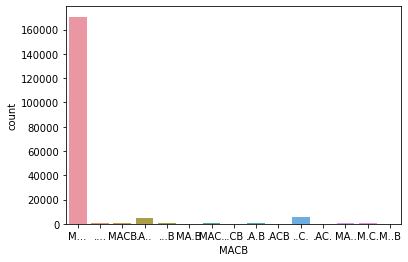

In [146]:
# plot 
ax = sns.countplot(x="MACB", data=df)

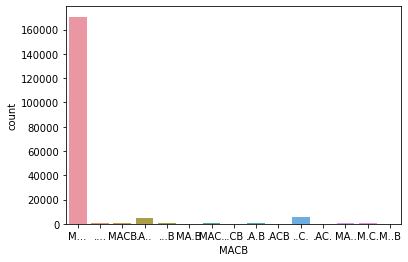

In [147]:
# plot 
ax = sns.countplot(x="MACB", data=df)


In [ ]:
# most are M...? check this out with nulls?

<function matplotlib.pyplot.show(close=None, block=None)>

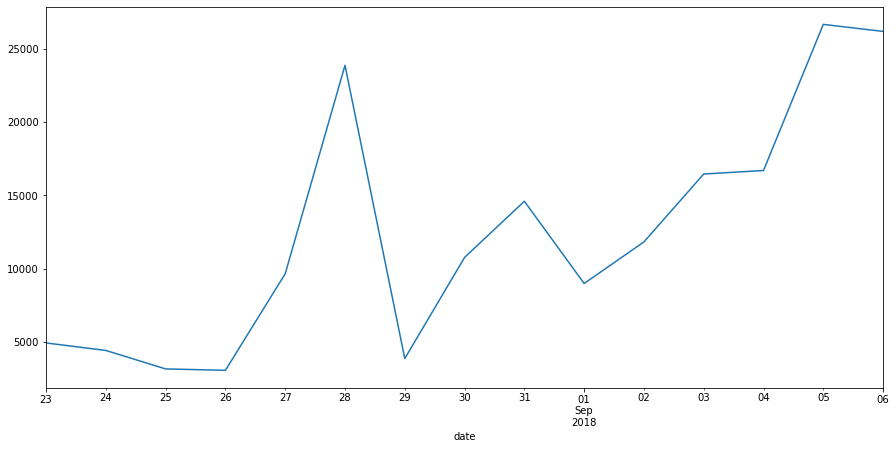

In [134]:
# plot 
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['date']).count()['type'].plot(ax=ax)
plt.show


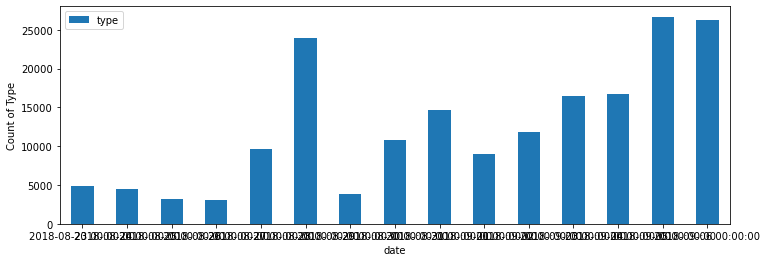

In [137]:
fig, axs = plt.subplots(figsize=(12, 4))

df.groupby(df["date"])["type"].count().plot(kind='bar', rot=0, ax=axs, legend=True)
plt.xlabel("date");  # custom x label using matplotlib
plt.ylabel("Count of Type");

![Picure](images/PosterSANS-1024x715.png)
